<a href="https://colab.research.google.com/github/poojagolande256-ui/Learning_Studio/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Change runtime

In [79]:
#non harmful warning will get ignore
from warnings import filterwarnings
filterwarnings("ignore")


Step-2 Data Ingestion

In [80]:
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"

In [81]:
import pandas as pd

In [82]:
df=pd.read_csv(url1)

In [83]:
df.head(1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0


In [84]:
loan=df

In [85]:
loan.loan_status.unique()

array([0, 1])

Step 3: Data Quality Check

In [86]:
loan.shape

(58645, 13)

In [87]:
loan.duplicated().sum()

np.int64(0)

In [88]:
 loan.isnull().sum()[loan.isnull().sum()>0]

,0


In [89]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [90]:
loan.loan_status.value_counts()

,count
loan_status,
0,50295
1,8350


<Axes: xlabel='loan_status'>

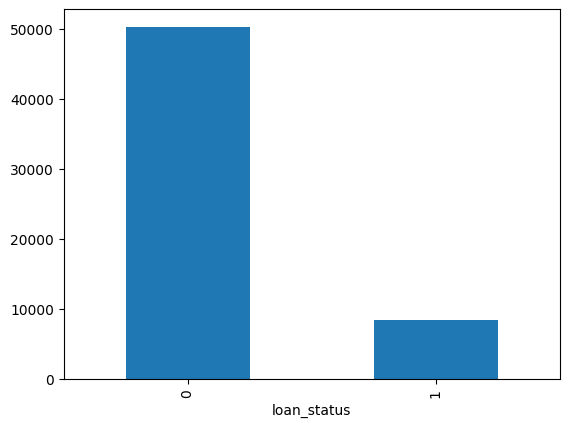

In [91]:
loan["loan_status"].value_counts().plot(kind="bar")

In [92]:
x=df.drop(columns=["id",'loan_status'])
y=df["loan_status"]

Step 4-Train Test Split

In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
xtest.shape

(11729, 11)

In [95]:
xtrain.shape

(46916, 11)

Step 6 - Apply data preprocessing on xtrain,xtest

In [96]:
cat_cols=x.select_dtypes(include="object").columns.tolist()
num_cols=x.select_dtypes(include="number").columns.tolist()

In [97]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [98]:
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [100]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
#create pipeline for numerical data

In [101]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")
)
#create pipeline for catogorical data

In [102]:
#implement the preprocessor-if we want to combine pipeline we need to use column transformer
pre=ColumnTransformer(
    [
        ("num",num_pipe,num_cols),
        ("cat",cat_pipe,cat_cols)
    ]
).set_output(transform="pandas")

In [103]:
pre.fit(xtrain,ytrain)
#fit the pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

Step 6 Label Encoding-Text-Number form

In [104]:
xtrain_pre=pre.transform(xtrain)
xtrain_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,2.887501,-0.107095,-0.931577,1.042639,-0.099501,0.995021,2.522433,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,-0.919449,0.152225,-0.931577,0.143702,-1.337179,-0.205762,-0.698714,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.735746,0.670864,-1.182680,-1.051884,-1.732183,-1.406545,0.044628,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,-0.091851,1.189504,-0.680475,-1.114809,0.838632,-1.406545,0.787969,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [105]:
xtest_pre=pre.transform(xtest)
xtest_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,-1.084969,-0.496074,-1.182680,-0.575447,-0.132418,-0.314924,-0.946495,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39660,-0.091851,-0.496074,0.072832,0.143702,0.493004,0.667535,1.035750,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28657,0.073668,-0.314551,-0.178270,-0.215873,0.397545,-0.096600,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24735,-0.091851,-0.677598,1.579447,-0.395660,-0.010625,0.230886,-0.203153,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 7 Model Training

To avoid overfitting:
1. Dropout layer
2. early Stopping - Stop at that point where validation loss start increasing.
3. l1/l2 Regularization


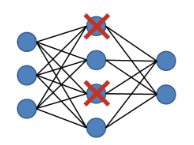

#early stopping
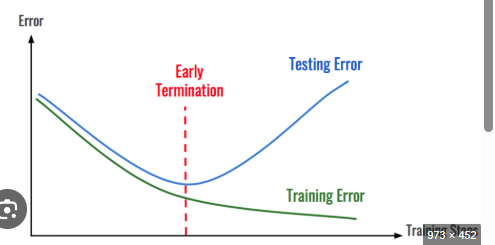

In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
model=Sequential(
    layers=[
        Input(shape=(xtrain_pre.shape[1],)),
        Dense(64,activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(32,activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

In [108]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

Step 8 Compile Model

In [109]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['auc'])

In [110]:
es=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [111]:
hist=model.fit(xtrain_pre,ytrain,epochs=100,validation_split=0.2,callbacks=[es])

Epoch 1/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - auc: 0.7804 - loss: 0.6520 - val_auc: 0.8984 - val_loss: 0.2786
Epoch 2/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - auc: 0.8900 - loss: 0.2875 - val_auc: 0.9040 - val_loss: 0.2676
Epoch 3/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - auc: 0.8937 - loss: 0.2759 - val_auc: 0.9050 - val_loss: 0.2583
Epoch 4/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - auc: 0.8968 - loss: 0.2683 - val_auc: 0.9046 - val_loss: 0.2570
Epoch 5/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - auc: 0.8959 - loss: 0.2654 - val_auc: 0.9086 - val_loss: 0.2544
Epoch 6/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - auc: 0.8966 - loss: 0.2618 - val_auc: 0.9068 - val_loss: 0.2502
Epoch 7/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.8994 - loss: 0.2565 - val_auc: 0.9063 - val_loss: 0.2558
Epoch 8/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8992 - loss: 0.2603 - val_auc: 0.9079 - val_loss: 0.2489
Epoch 9/100
1173/1173 ━━━━━━━━━

Step 9 Plot Learning Curve

In [112]:
import matplotlib.pyplot as plt

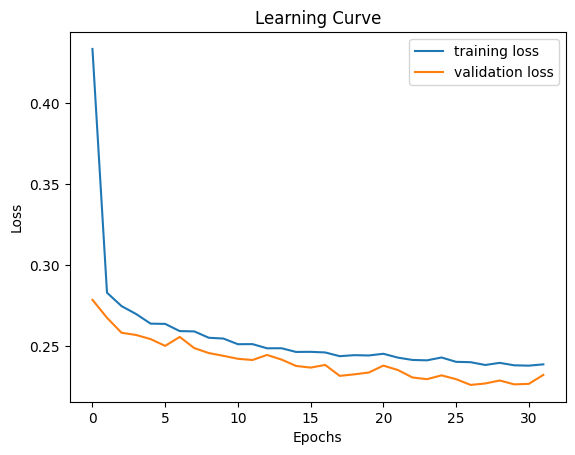

In [113]:
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Learning Curve")
plt.legend()
plt.show()

Step 10 Model Evaluation for training data

In [114]:
train_loss,train_auc=model.evaluate(xtrain_pre,ytrain)
print(f"Training Loss: {train_loss}")
print(f"Training AUC: {train_auc}")

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.9211 - loss: 0.2216
Training Loss: 0.22135582566261292
Training AUC: 0.922212541103363


Step 11 Model Evaluation for test data

In [115]:
test_loss,test_auc=model.evaluate(xtest_pre,ytest)
print(f"Test Loss: {test_loss}")
print(f"Test AUC: {test_auc}")

367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.9360 - loss: 0.2110
Test Loss: 0.2151251882314682
Test AUC: 0.928994357585907


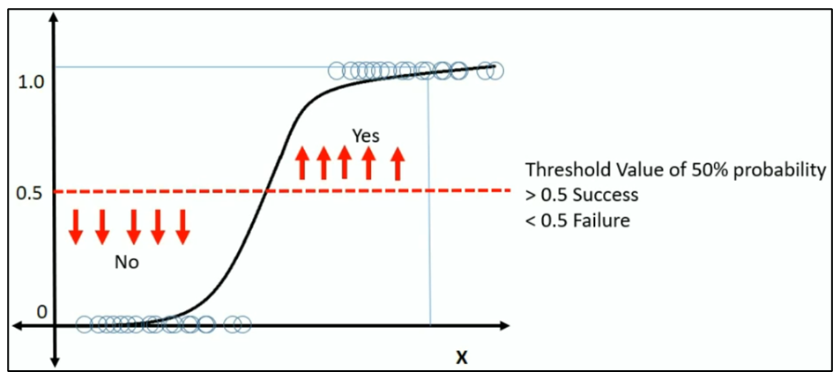

step 12 Probability of classes

In [117]:
yprob_xtrain_pre=model.predict(xtrain_pre)


1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [118]:
ypred_train=[1 if prob>=0.5 else 0 for prob in yprob_xtrain_pre]
ypred_train[0:5]

[0, 0, 0, 0, 0]

In [122]:
yprob_xtest_pre=model.predict(xtest_pre)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [123]:
ypred_test=[1 if prob>=0.5 else 0 for prob in yprob_xtest_pre]
ypred_test[0:5]

[0, 0, 0, 0, 0]

Step 12 Confusion matrix display

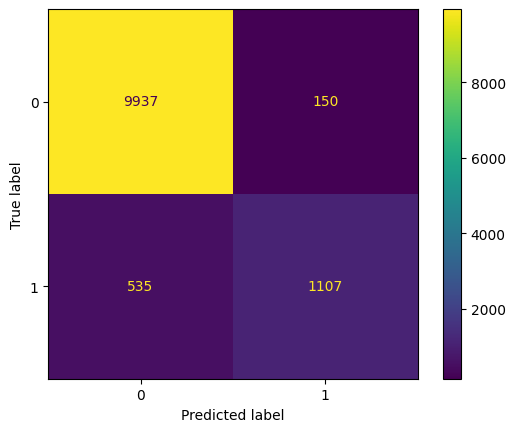

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,RocCurveDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [130]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.88      0.67      0.76      1642

    accuracy                           0.94     11729
   macro avg       0.91      0.83      0.87     11729
weighted avg       0.94      0.94      0.94     11729



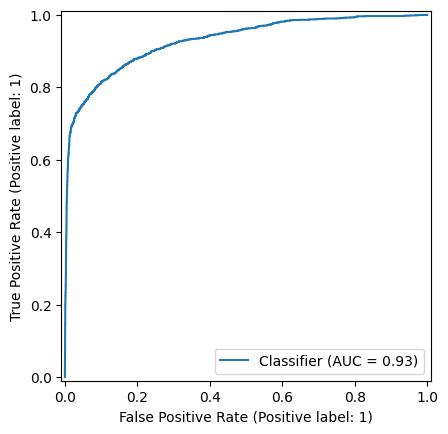

In [131]:
print(RocCurveDisplay.from_predictions(ytest,yprob_xtest_pre))

above results showcase it is a good model


Step 13 - Out of sample prediction (Model Infernce , were are using the model to approve or reject the customer loans)

In [132]:
url2="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_loan.csv"

In [136]:
xnew=pd.read_csv(url2)

In [137]:
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [138]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [140]:
xnew_pre=pre.transform(xnew)
xnew_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.753930,0.126293,-0.429373,2.840512,1.671432,2.195805,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257371,0.826456,0.323935,0.143702,0.657589,-0.642411,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257371,-0.885054,0.072832,-0.935022,2.142144,-0.314924,-0.946495,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901266,-0.366415,-0.178270,-0.395660,-0.586672,-0.205762,0.292408,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257371,0.982048,0.826140,1.042639,1.855767,-0.096600,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.919449,-0.853936,-0.680475,-1.114809,-0.102793,-0.642411,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39094,-0.919449,-0.418278,0.323935,-0.395660,-1.531389,-0.096600,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39095,3.880618,-0.107095,-1.182680,1.042639,-1.044218,0.995021,4.752458,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39096,-0.919449,-0.729462,-0.178270,0.862851,1.625348,2.523291,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [141]:
prob_xnew=model.predict(xnew_pre)
prob_xnew

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.92794037],
       [0.02906913],
       [0.573846  ],
       ...,
       [0.03010954],
       [0.43763396],
       [0.9834981 ]], dtype=float32)

In [143]:
preds=[1 if prob>=0.5 else 0 for prob in prob_xnew]
preds[0:5]

[1, 0, 1, 0, 0]

In [147]:
res=xnew[['id']]
res['loan_status']=preds
res['approval_prob']=prob_xnew.round(4)
res.head()

,id,loan_status,approval_prob
0,58645,1,0.9279
1,58646,0,0.0291
2,58647,1,0.5738
3,58648,0,0.0441
4,58649,0,0.2806


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loan_status'].plot(kind='hist', bins=20, title='loan_status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['approval_prob'].plot(kind='hist', bins=20, title='approval_prob')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='id', y='loan_status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='loan_status', y='approval_prob', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['loan_status']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('loan_status')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['approval_prob']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('approval_prob')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['loan_status'].plot(kind='line', figsize=(8, 4), title='loan_status')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['approval_prob'].plot(kind='line', figsize=(8, 4), title='approval_prob')
plt.gca().spines[['top', 'right']].set_visible(False)

In [150]:
res.loan_status.value_counts()

,count
loan_status,
0,34973
1,4125


In [151]:
res.to_csv("loan_res.csv",index=False)

Step 14 Save the model

In [154]:
model.save("loan_model.keras")

In [155]:
import joblib
joblib.dump(pre,"loan_pre.joblib")

['loan_pre.joblib']

Step 15 Load the above file

In [157]:
p=joblib.load("loan_pre.joblib")

In [158]:
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [161]:
from keras.models import load_model
m=load_model("loan_model.keras")
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,172 (28.02 KB)